In [144]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

In [76]:
# 1.1 Дослідити дані, підготувати їх для побудови регресійної моделі.

df = pd.read_csv('winequality-red.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


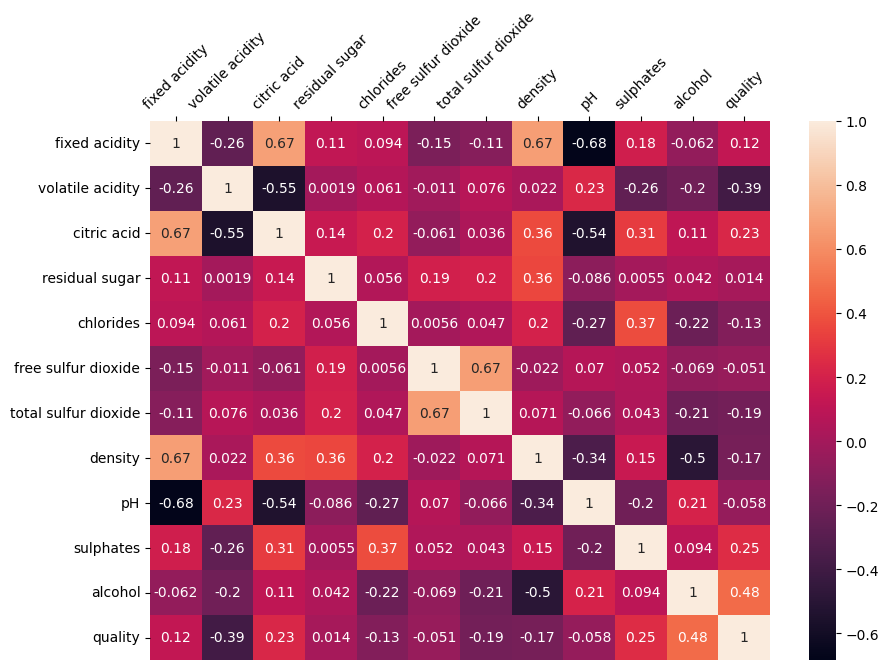

In [77]:
corr = df.corr()
plt.figure(figsize=(10, 7))
ax = sns.heatmap(corr, annot=True)
ax.xaxis.tick_top()
plt.xticks(rotation=45)
plt.show()

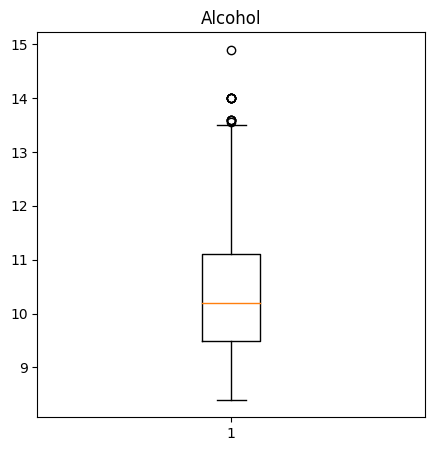

In [78]:
plt.figure(figsize=(5, 5))
plt.boxplot(df["alcohol"])
plt.title("Alcohol")
plt.show()

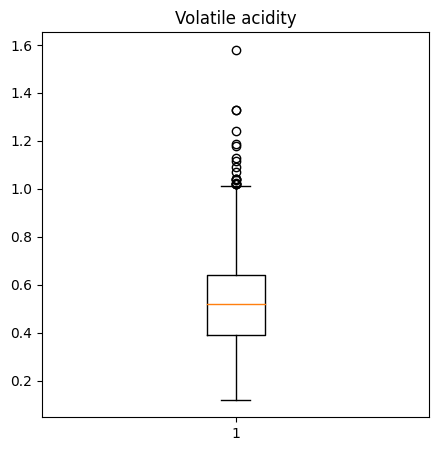

In [79]:
plt.figure(figsize=(5, 5))
plt.boxplot(df['volatile acidity'])
plt.title("Volatile acidity")
plt.show()

In [156]:
# 1.2 Розділити дані на навчальну та тестову вибірки.

X_wine = df.drop(columns="quality")
y_wine = df["quality"]
X_wine_train, X_wine_test, y_wine_train, y_wine_test \
    = train_test_split(
        X_wine,
        y_wine,
        test_size=0.3,
        random_state=42
    )

In [152]:
# 1.3 Побудувати декілька регресійних моделей для прогнозу якості вина

# Одновимірна лінійна регресія
alcohol_lr = LinearRegression().fit(
    X_wine_train["alcohol"].to_numpy().reshape(-1, 1),
    y_wine_train
)

# Багатовимірна лінійна регресія
alcohol_volatile_acidity_lr = LinearRegression().fit(
    X_wine_train[["alcohol", "volatile acidity"]],
    y_wine_train
)

# Поліноміальна регресія
alcohol_volatile_acidity_pr = make_pipeline(
    PolynomialFeatures(degree=2),
    LinearRegression()
).fit(
    X_wine_train[["alcohol", "volatile acidity"]],
    y_wine_train
)

In [167]:
# 1.4 Використовуючи тестову вибірку, з'ясувати яка з моделей краща

# Одновимірна лінійна регресія
y_wine_pred1 = np.asarray(
    alcohol_lr.predict(
        X_wine_test["alcohol"].to_numpy().reshape(-1, 1)
    )
).round()

# Багатовимірна лінійна регресія
y_wine_pred2 = np.asarray(
    alcohol_volatile_acidity_lr.predict(
        X_wine_test[["alcohol", "volatile acidity"]]
    )
).round()

# Поліноміальна регресія
y_wine_pred3 = np.asarray(
    alcohol_volatile_acidity_pr.predict(
        X_wine_test[["alcohol", "volatile acidity"]]
    )
).round()

wine_quality_accuracies = [
    ('Linear regression: alcohol',
     accuracy_score(y_wine_pred1, y_wine_test)),
    ('Linear regression: alcohol and volatile acidity',
     accuracy_score(y_wine_pred2, y_wine_test)),
    ('Polynomial regression: alcohol and volatile acidity',
     accuracy_score(y_wine_pred3, y_wine_test))
]

best_wine_model, max_accuracy_score = max(wine_quality_accuracies, key=lambda t: t[1])
print(f'Best model:\n\t{best_wine_model}\n\tAccuracy score = {max_accuracy_score.round(4)}')

Best model:
	Polynomial regression: alcohol and volatile acidity
	Accuracy score = 0.5542


In [168]:
# 2.1 Дослідити дані, сказати чи є мультиколінеарність, побудувати діаграми розсіювання.

df4 = pd.read_csv('Data4.csv', encoding='cp1251', sep=';', decimal=',')
df4.rename(columns={'Unnamed: 0': 'EN'}, inplace=True)

df4[['Cql', 'Ie', 'Iec', 'Is']].corr()

,Cql,Ie,Iec,Is
Cql,1.000000,0.883664,0.875545,0.939172
Ie,0.883664,1.000000,0.619247,0.746320
Iec,0.875545,0.619247,1.000000,0.799211
Is,0.939172,0.746320,0.799211,1.000000


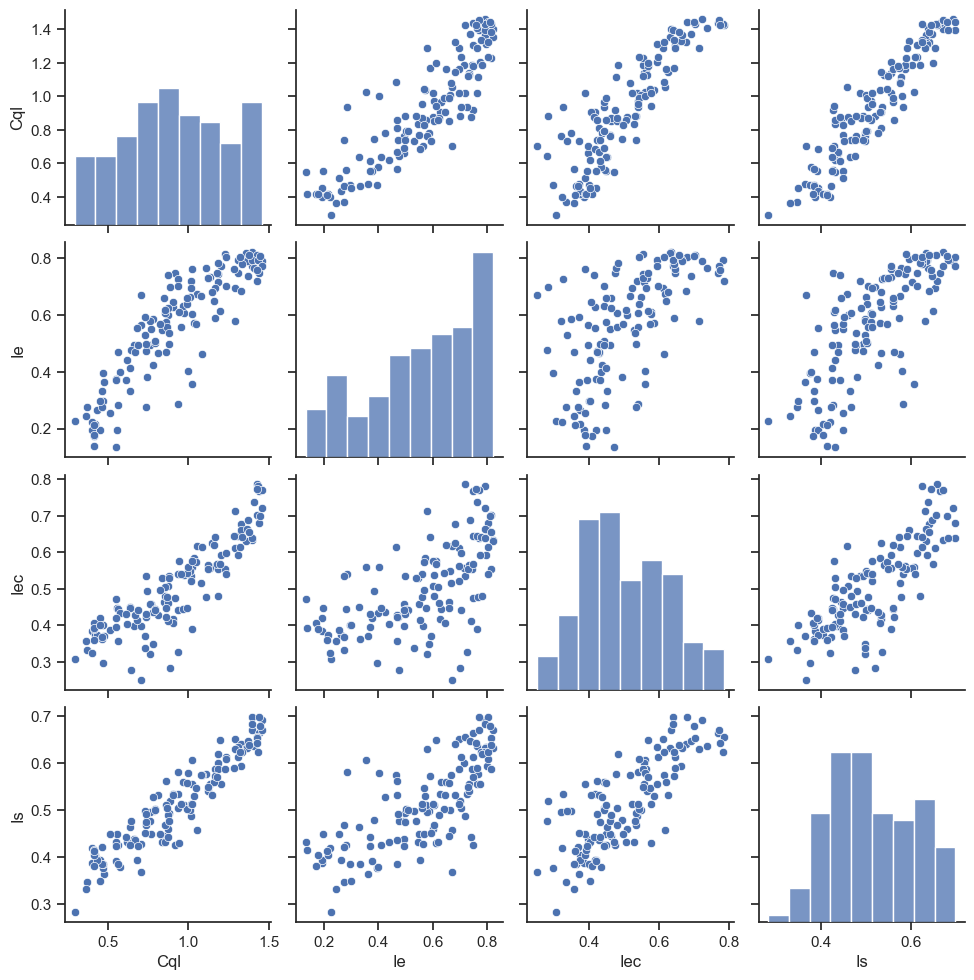

In [124]:
sns.pairplot(df4)

In [160]:
# 2.2 Побудувати декілька регресійних моделей (використати лінійну регресію та поліноміальну регресію обраного вами виду)

X_d4 = df4.drop(columns=['Cql'])
y_d4 = df4['Cql']

is_lr = LinearRegression().fit(
    X_d4['Is'].to_numpy().reshape(-1, 1),
    y_d4
)

ie_iec_lr = LinearRegression().fit(
    X_d4[['Ie', 'Iec']],
    y_d4
)

ie_iec_is_pr = make_pipeline(
    PolynomialFeatures(degree=2),
    LinearRegression()
).fit(
    X_d4[['Ie', 'Iec', 'Is']],
    y_d4
)

In [169]:
# 2.3 Використовуючи тестову вибірку з файлу Data4t.csv, з'ясувати яка з моделей краща

df4t = pd.read_csv('Data4t.csv', encoding='cp1251', sep=';', decimal=',')
df4t.rename(columns={'Unnamed: 0': 'EN'}, inplace=True)

y_d4_pred1 = ie_iec_lr.predict(df4t[['Ie', 'Iec']])
y_d4_pred2 = is_lr.predict(df4t['Is'].to_numpy().reshape(-1, 1))
y_d4_pred3 = ie_iec_is_pr.predict(df4t[['Ie', 'Iec', 'Is']])

y_true = df4t['Cql'].to_numpy()

d4_deviations = [
    ('Linear regression: Cql ~ Ie, Iec',
     np.mean(abs(y_d4_pred1 - y_true))),
    ('Linear regression: Cql ~ Is',
     np.mean(abs(y_d4_pred2 - y_true))),
    ('Polynomial regression: Cql ~ Ie, Iec, Is',
     np.mean(abs(y_d4_pred3 - y_true)))
]

best_d4_model, max_avg_deviation = min(d4_deviations, key=lambda t: t[1])
print(f'Best model:\n\t{best_d4_model}\n\tAverage deviation = {max_avg_deviation.round(4)}')

Best model:
	Polynomial regression: Cql ~ Ie, Iec, Is
	Average deviation = 0.0059
